In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\practice.csv", na_values ='null')

In [5]:
df.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9,39,4,Andhra Pradesh
1,Guntur,11,81,2,Andhra Pradesh
2,Hydrabad,24,79,5,Andhra Pradesh
3,Kothagudem,11,62,2,Andhra Pradesh
4,Kurnool,9,85,4,Andhra Pradesh


In [7]:
df.isnull().sum()

City     0
NO2      0
PM10     0
SO2      0
State    0
dtype: int64

In [8]:
df.shape


(181, 5)

In [15]:
df=df.dropna()

In [16]:
df.shape

(181, 5)

In [17]:
df.dtypes


City     object
NO2      object
PM10     object
SO2      object
State    object
dtype: object

In [18]:
df_pol=df.groupby('State',as_index=False)[['NO2','PM10','SO2']].agg(np.sum)


In [19]:
df_pol.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,91124119231223129141016,39817962858565766837935271,42524521144647
1,Assam,151414151515141614161316,5858387394761036859816858,656676676667
2,Bihar,40,181,7
3,Chandigarh,16,92,2
4,Chattisgarh,22192143,109Null104289,981315


In [25]:
df_num = df_pol.select_dtypes(include=[np.number])

def scale(x):
    return (x - np.mean(x)) / np.std(x)
df_scaled = df_num.apply(scale, axis=0)

In [26]:
df_scaled.head()

""
0
1
2
3
4


In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
data_scaled=np.array(df_scaled)

In [30]:
Z=linkage(df_scaled,method="ward")

C:\ProgramData\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2844: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


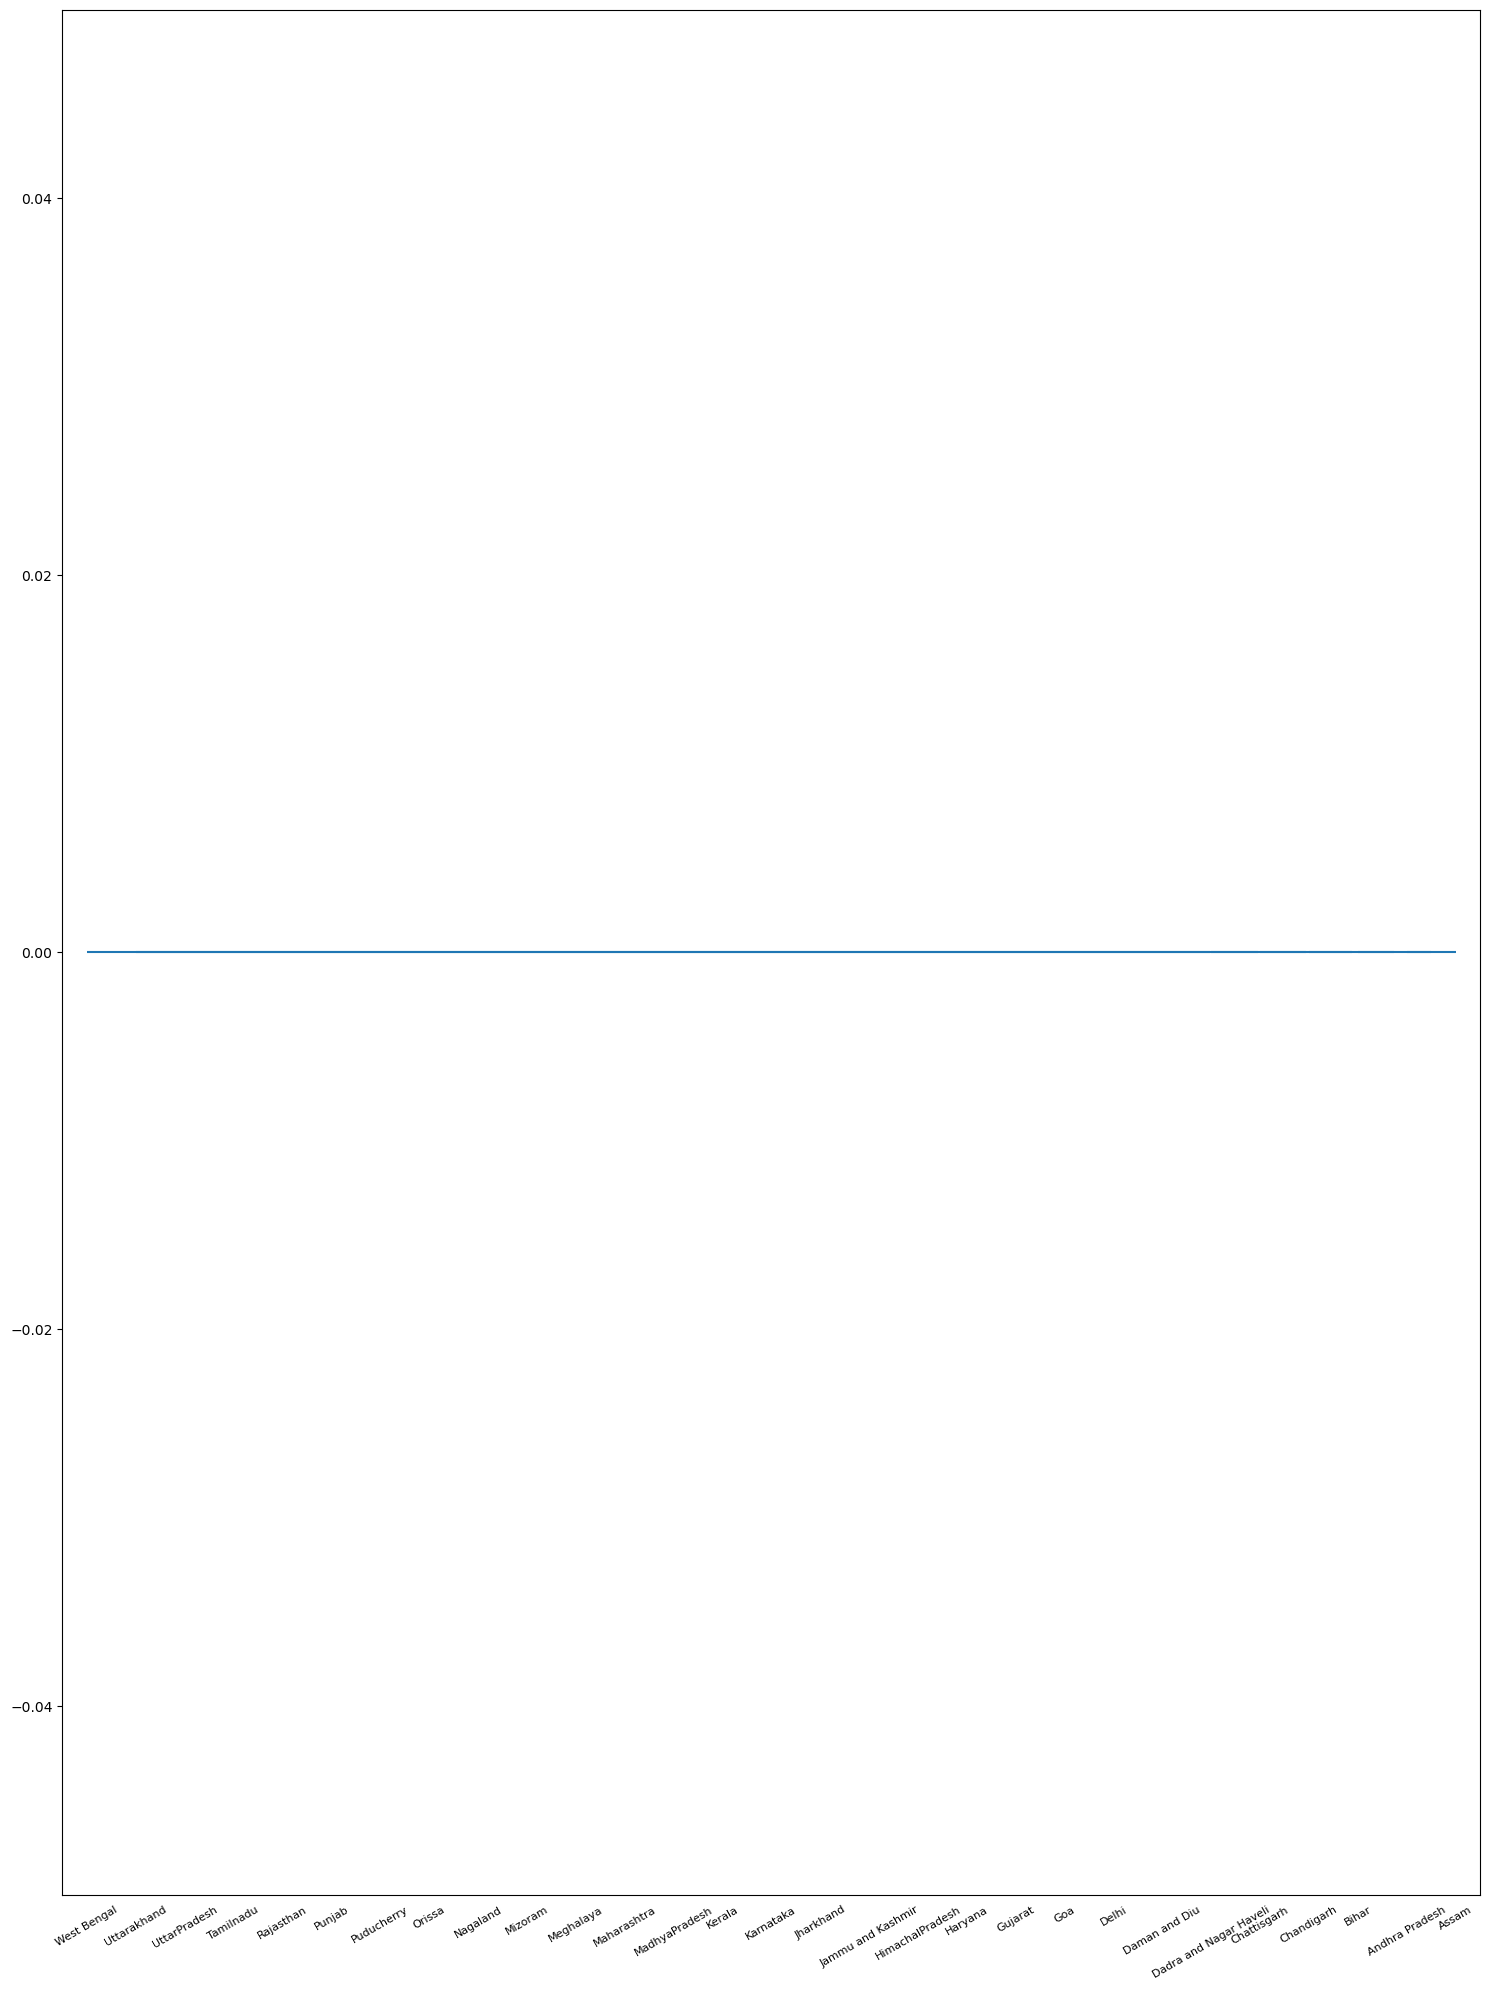

In [31]:
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="top",labels=np.array(df_pol['State']),leaf_rotation=30,leaf_font_size=8)
plt.tight_layout()
plt.show()